<a href="https://colab.research.google.com/github/Kasspex/Telecom-X/blob/main/Telecom_X.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Extracción**

In [1]:
import pandas as pd
url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'
df = pd.read_json(url)

df_customer = pd.json_normalize(df['customer'])
df_phone = pd.json_normalize(df['phone'])
df_internet = pd.json_normalize(df['internet'])
df_account = pd.json_normalize(df['account'])

df = pd.concat([df[['customerID', 'Churn']], df_customer, df_phone, df_internet, df_account], axis=1)

df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


# **Transformación**

In [2]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


# **Carga y análisis**

#**Informe final**

In [3]:
df['Charges.Total'] = pd.to_numeric(df['Charges.Total'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [4]:
df['Charges.Total'] = df['Charges.Total'].fillna(0.0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [5]:
df['Cuentas_Diarias'] = df['Charges.Monthly'] / 30
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


In [6]:
object_cols = df.select_dtypes(include='object').columns

df['Churn'] = df['Churn'].replace('', 'No')

for col in object_cols:
    if col == 'Churn':
        df[col] = df[col].map({'Yes': 1, 'No': 0})
    elif 'Yes' in df[col].unique() and ('No' in df[col].unique() or f'No {col.replace("Service", "").lower()} service' in df[col].unique()):
        # Handle 'No internet service' and 'No phone service' cases
        if col in ['InternetService', 'PhoneService']:
             df[col] = df[col].map({'Yes': 1, 'No': 0, f'No {col.replace("Service", "").lower()} service': 0})
        # Handle other Yes/No columns
        elif 'Yes' in df[col].unique() and 'No' in df[col].unique() and len(df[col].unique()) <= 2:
             df[col] = df[col].map({'Yes': 1, 'No': 0})
        elif 'Yes' in df[col].unique() and 'No' in df[col].unique() and 'No internet service' in df[col].unique():
             df[col] = df[col].map({'Yes': 1, 'No': 0, 'No internet service': 0})
        elif 'Yes' in df[col].unique() and 'No' in df[col].unique() and 'No phone service' in df[col].unique():
             df[col] = df[col].map({'Yes': 1, 'No': 0, 'No phone service': 0})


df['Churn'] = df['Churn'].astype(int)

df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.796667


In [7]:
df.describe()

,Churn,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Charges.Monthly,Charges.Total,Cuentas_Diarias
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.257190,0.162653,0.484106,0.300124,32.346498,0.902711,0.421770,0.285950,0.344571,0.342782,0.289528,0.383927,0.387505,0.593230,64.720098,2277.182035,2.157337
std,0.437115,0.369074,0.499782,0.458343,24.571773,0.296371,0.493876,0.451897,0.475261,0.474672,0.453575,0.486374,0.487214,0.491265,30.129572,2268.648587,1.004319
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.425000,396.200000,1.180833
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.300000,1389.200000,2.343333
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.875000,3778.525000,2.995833
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.958333


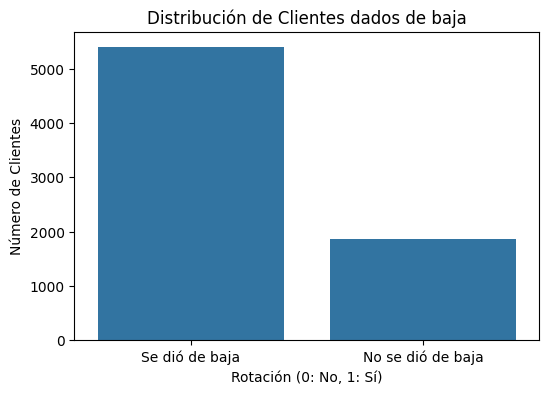

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df)
plt.title('Distribución de Clientes dados de baja')
plt.xlabel('Rotación (0: No, 1: Sí)')
plt.ylabel('Número de Clientes')
plt.xticks(ticks=[0, 1], labels=['Se dió de baja', 'No se dió de baja'])
plt.show()

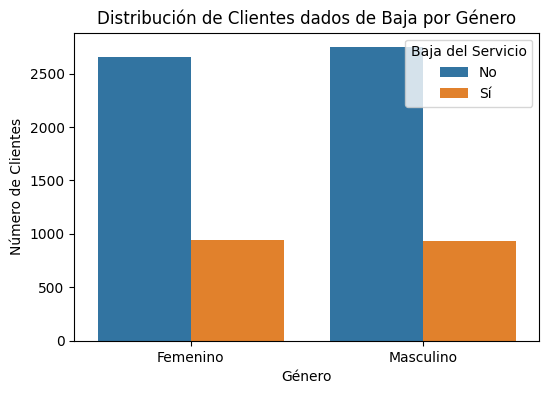

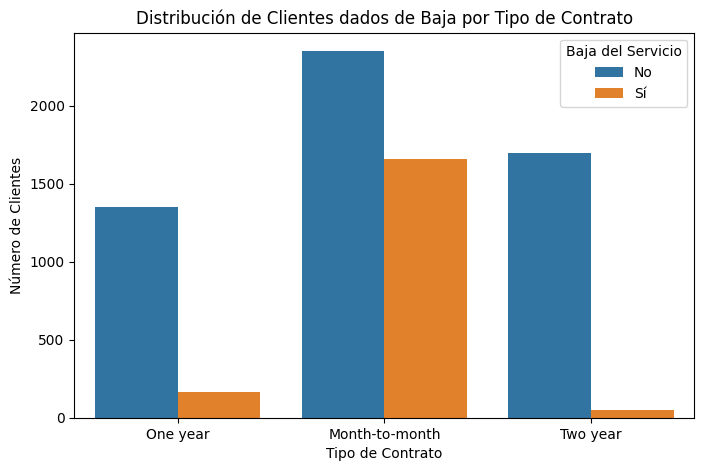

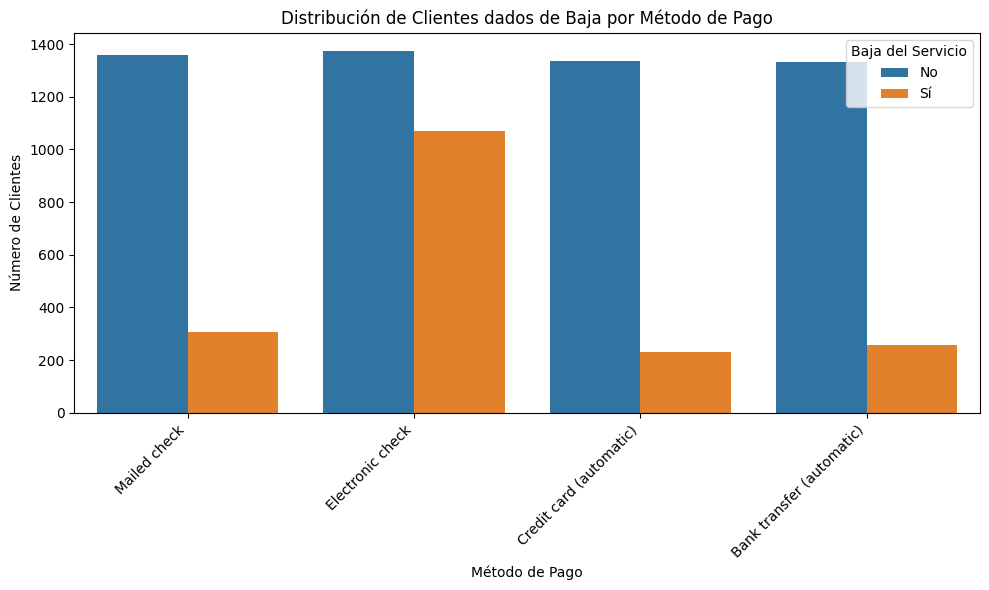

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(x='gender', hue='Churn', data=df)
plt.title('Distribución de Clientes dados de Baja por Género')
plt.xlabel('Género')
plt.ylabel('Número de Clientes')
plt.xticks(ticks=[0, 1], labels=['Femenino', 'Masculino'])
plt.legend(title='Baja del Servicio', labels=['No', 'Sí'])
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Distribución de Clientes dados de Baja por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Número de Clientes')
plt.legend(title='Baja del Servicio', labels=['No', 'Sí'])
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='PaymentMethod', hue='Churn', data=df)
plt.title('Distribución de Clientes dados de Baja por Método de Pago')
plt.xlabel('Método de Pago')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Baja del Servicio', labels=['No', 'Sí'])
plt.tight_layout()
plt.show()

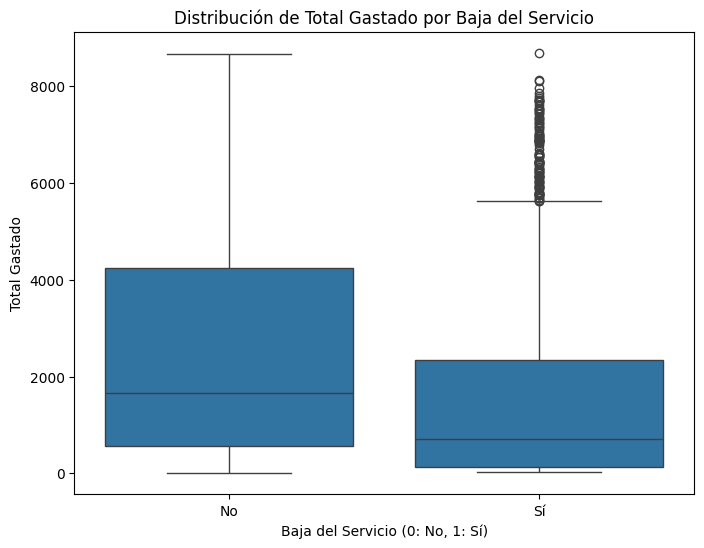

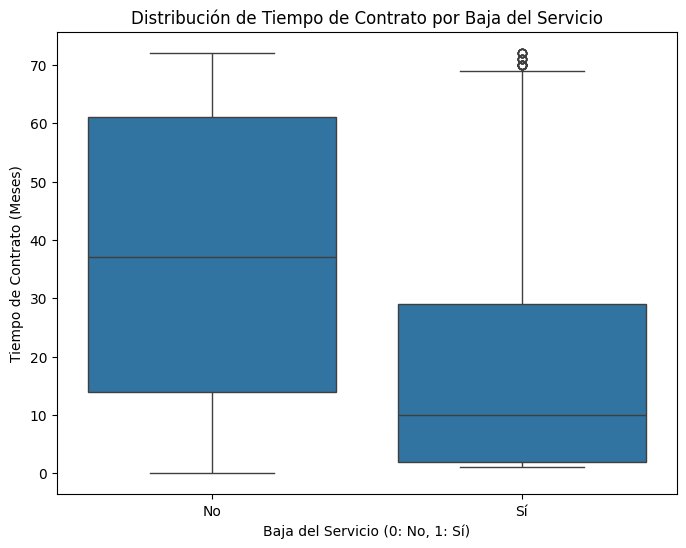

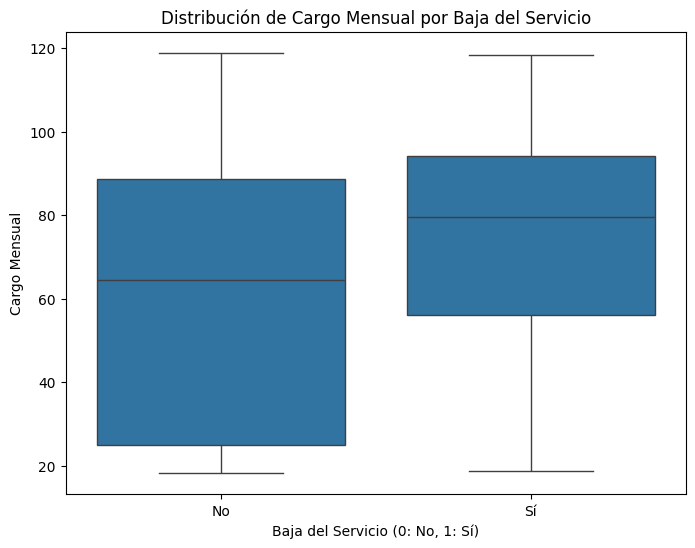

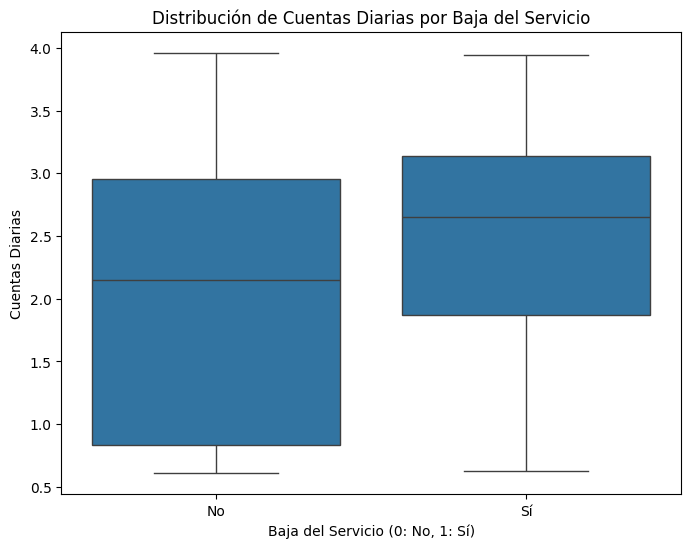

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='Charges.Total', data=df)
plt.title('Distribución de Total Gastado por Baja del Servicio')
plt.xlabel('Baja del Servicio (0: No, 1: Sí)')
plt.ylabel('Total Gastado')
plt.xticks(ticks=[0, 1], labels=['No', 'Sí'])
plt.show()


plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Distribución de Tiempo de Contrato por Baja del Servicio')
plt.xlabel('Baja del Servicio (0: No, 1: Sí)')
plt.ylabel('Tiempo de Contrato (Meses)')
plt.xticks(ticks=[0, 1], labels=['No', 'Sí'])
plt.show()


plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='Charges.Monthly', data=df)
plt.title('Distribución de Cargo Mensual por Baja del Servicio')
plt.xlabel('Baja del Servicio (0: No, 1: Sí)')
plt.ylabel('Cargo Mensual')
plt.xticks(ticks=[0, 1], labels=['No', 'Sí'])
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='Cuentas_Diarias', data=df)
plt.title('Distribución de Cuentas Diarias por Baja del Servicio')
plt.xlabel('Baja del Servicio (0: No, 1: Sí)')
plt.ylabel('Cuentas Diarias')
plt.xticks(ticks=[0, 1], labels=['No', 'Sí'])
plt.show()

# Informe Final del Análisis de Rotación de Clientes (Churn)

## Introducción

El presente informe detalla el análisis exploratorio de datos realizado sobre el conjunto de datos de TelecomX con el objetivo de comprender los factores que influyen en la rotación de clientes (Churn). La rotación de clientes representa un desafío significativo para las empresas, ya que retener a los clientes existentes suele ser más rentable que adquirir nuevos. Este análisis busca identificar patrones y obtener insights que permitan desarrollar estrategias efectivas para reducir la tasa de rotación.

## Limpieza y Tratamiento de Datos

Para asegurar la calidad de los datos para el análisis, se realizaron los siguientes pasos de limpieza y transformación:

1.  **Carga y Normalización:** Se cargaron los datos desde el archivo JSON y se normalizaron las columnas anidadas ('customer', 'phone', 'internet', 'account') para crear una estructura de DataFrame plana.
2.  **Conversión de Tipo de Datos:** La columna 'Charges.Total', inicialmente como tipo 'object', fue convertida a tipo numérico (float64), manejando los valores no numéricos al coercerlos a nulos.
3.  **Tratamiento de Valores Nulos:** Los valores nulos identificados en la columna 'Charges.Total' (resultantes de la conversión) y los strings vacíos en la columna 'Churn' (identificados posteriormente) fueron tratados:
    *   Los valores nulos en 'Charges.Total' fueron reemplazados por 0.0.
    *   Los strings vacíos en 'Churn' fueron reemplazados por 'No'.
4.  **Creación de Nueva Característica:** Se creó la columna 'Cuentas_Diarias' dividiendo el 'Charges.Monthly' por 30 para obtener un cargo diario estimado.
5.  **Codificación de Variables Categóricas Binarias:** Las columnas con valores binarios ('Yes'/'No' y sus variaciones, incluyendo 'Churn') fueron codificadas numéricamente, mapeando 'Yes' a 1 y 'No' (y los valores de "No service") a 0. La columna 'Churn' fue convertida explícitamente a tipo entero.

## Análisis Exploratorio de Datos

En esta sección, exploramos la distribución de la rotación de clientes y su relación con diversas variables, tanto categóricas como numéricas. Los análisis visuales nos permitieron identificar patrones y posibles factores influyentes en la decisión de los clientes de cancelar el servicio.

*   **Distribución General de la Rotación:** Se visualizó la proporción de clientes que se dieron de baja y los que no, revelando un desbalance en la clase (mayoría de clientes que no rotaron). (Referirse al primer gráfico de barras de Churn)

*   **Análisis por Variables Categóricas:** Examinamos la distribución de la rotación en función de variables como género, tipo de contrato y método de pago. Los gráficos de barras (count plots) mostraron diferencias notables en la tasa de rotación entre las distintas categorías. (Referirse a los gráficos de barras por género, contrato y método de pago)

*   **Análisis por Variables Numéricas:** Se analizaron las distribuciones de variables numéricas como el total gastado, el tiempo de contrato, el cargo mensual y las cuentas diarias para los clientes que rotaron y los que no. Los gráficos de caja (box plots) ayudaron a comparar estas distribuciones. (Referirse a los gráficos de caja de las variables numéricas)



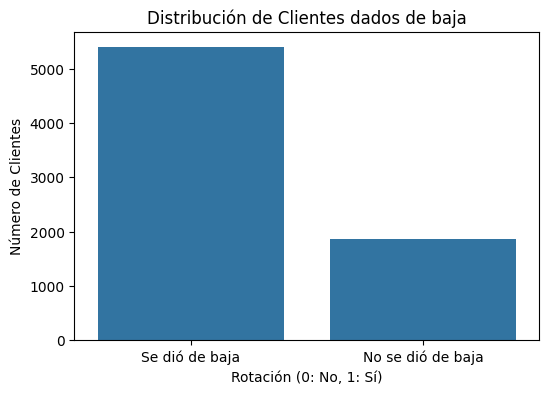

In [15]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df)
plt.title('Distribución de Clientes dados de baja')
plt.xlabel('Rotación (0: No, 1: Sí)')
plt.ylabel('Número de Clientes')
plt.xticks(ticks=[0, 1], labels=['Se dió de baja', 'No se dió de baja'])
plt.savefig('B_clientes_dados_de_baja')

plt.show()

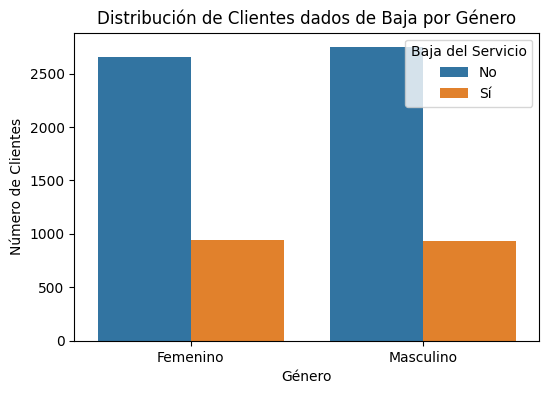

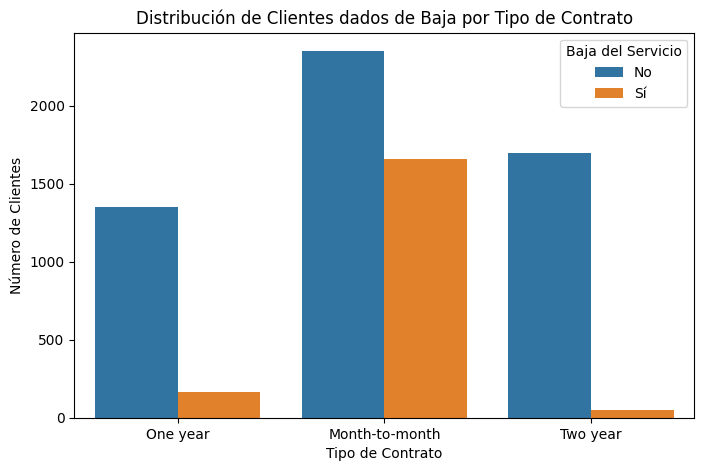

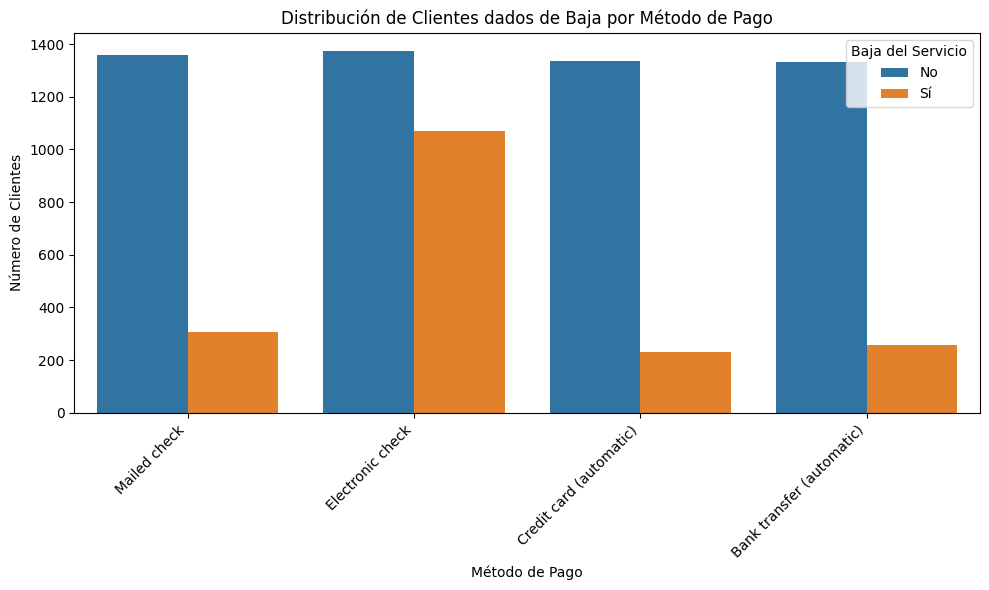

In [16]:
plt.figure(figsize=(6, 4))
sns.countplot(x='gender', hue='Churn', data=df)
plt.title('Distribución de Clientes dados de Baja por Género')
plt.xlabel('Género')
plt.ylabel('Número de Clientes')
plt.xticks(ticks=[0, 1], labels=['Femenino', 'Masculino'])
plt.legend(title='Baja del Servicio', labels=['No', 'Sí'])
plt.savefig('B_genero.png')
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Distribución de Clientes dados de Baja por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Número de Clientes')
plt.legend(title='Baja del Servicio', labels=['No', 'Sí'])
plt.savefig('B_Tipo_de_contrato.png')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='PaymentMethod', hue='Churn', data=df)
plt.title('Distribución de Clientes dados de Baja por Método de Pago')
plt.xlabel('Método de Pago')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Baja del Servicio', labels=['No', 'Sí'])
plt.tight_layout()
plt.savefig('B_Metodo_de_pago.png')
plt.show()

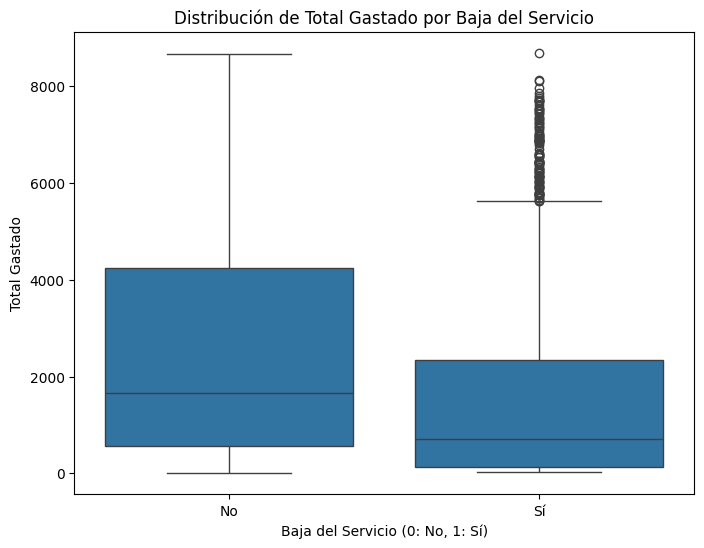

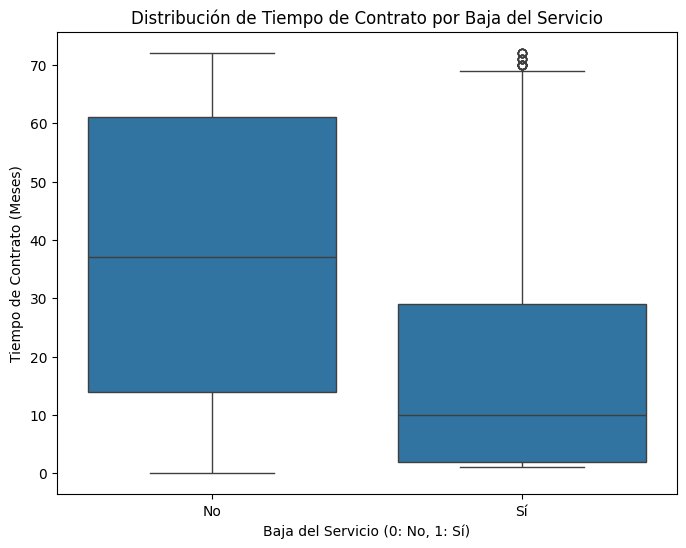

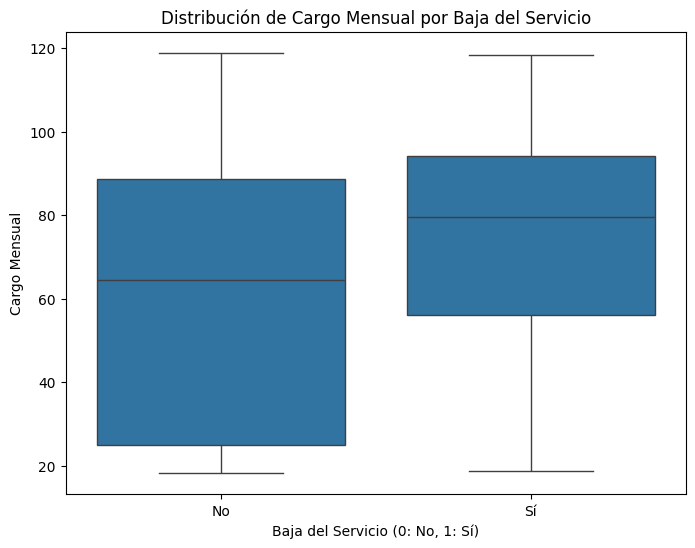

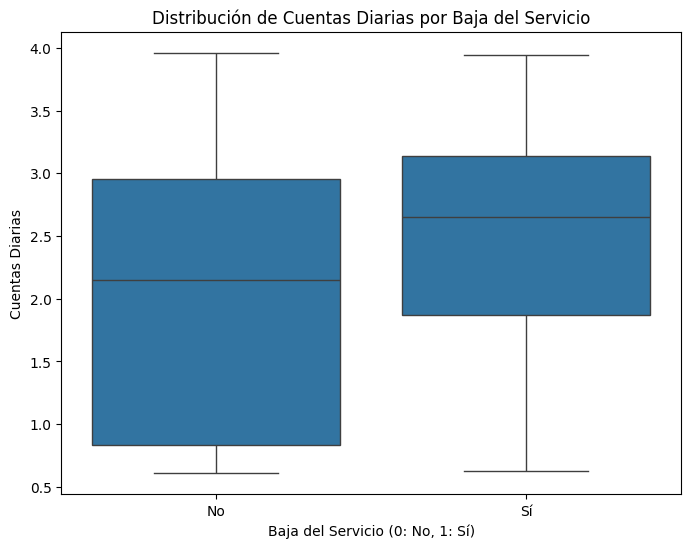

In [17]:

plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='Charges.Total', data=df)
plt.title('Distribución de Total Gastado por Baja del Servicio')
plt.xlabel('Baja del Servicio (0: No, 1: Sí)')
plt.ylabel('Total Gastado')
plt.xticks(ticks=[0, 1], labels=['No', 'Sí'])
plt.savefig('D_Total_gastado.png')
plt.show()


plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Distribución de Tiempo de Contrato por Baja del Servicio')
plt.xlabel('Baja del Servicio (0: No, 1: Sí)')
plt.ylabel('Tiempo de Contrato (Meses)')
plt.xticks(ticks=[0, 1], labels=['No', 'Sí'])
plt.savefig('D_Tiempo_de_contrato.png')

plt.show()


plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='Charges.Monthly', data=df)
plt.title('Distribución de Cargo Mensual por Baja del Servicio')
plt.xlabel('Baja del Servicio (0: No, 1: Sí)')
plt.ylabel('Cargo Mensual')
plt.xticks(ticks=[0, 1], labels=['No', 'Sí'])
plt.savefig('D_Cargo_mensual.png')

plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='Cuentas_Diarias', data=df)
plt.title('Distribución de Cuentas Diarias por Baja del Servicio')
plt.xlabel('Baja del Servicio (0: No, 1: Sí)')
plt.ylabel('Cuentas Diarias')
plt.xticks(ticks=[0, 1], labels=['No', 'Sí'])
plt.savefig('D_Cuentas_diarias.png')

plt.show()

## Conclusiones e Insights

Basándonos en el análisis exploratorio de datos, podemos extraer las siguientes conclusiones e insights clave sobre la rotación de clientes:


    *    Se pudo evidenciar que los clientes con contratos por mes, se dan de baja más que los clientes que tienen contrato por años
    *  Los clientes que cancelan el servicio tienden a hacerlo en una etapa muy temprana de su contrato. Mientras que los clientes que se quedan tienen, en promedio, una antigüedad mucho mayor. La mediana de tiempo de contrato para los que se van es de solo 10 meses, en comparación con los 37 meses para los que se quedan.
    *   Los clientes que cancelan el servicio tienden a tener un cargo mensual más alto. Un precio elevado parece ser un factor que se asocia con la decisión de darse de baja.

## Recomendaciones

Con base en las conclusiones e insights obtenidos del análisis, se proponen las siguientes recomendaciones estratégicas para reducir la rotación de clientes:

*   **(Recomendación 1):** Identificar a los clientes en los planes más caros que además son relativamente nuevos. Dirigir a este segmento campañas específicas que refuercen el valor que están recibiendo, como informes de uso personalizado o acceso exclusivo a nuevas funcionalidades..

*   **(Recomendación 2):** Crear un programa de bienvenida robusto para los primeros 30-90 días. Esto puede incluir tutoriales guiados, correos electrónicos de seguimiento con consejos útiles, y webinars de iniciación. El objetivo es que el cliente experimente el valor del servicio ("momento ¡Ajá!") lo más rápido posible.

